**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



**Set global variables**

In [2]:
txt_fdiry = file.path(FD_RES, "region_coverage_fcc")
vec = dir(txt_fdiry)
for (txt in vec) {cat(txt, "\n")}

In [3]:
txt_region = "fcc_astarr_macs_input_union"
txt_fdiry  = file.path(FD_RES, "region_coverage_fcc_score", txt_region)
vec = dir(txt_fdiry)
for (txt in vec) {cat(txt, "\n")}

CRISPRi_FlowFISH_K562_Riley_JinWoo 
CRISPRi_Growth_K562_Gersbach_JinWoo 
MPRA_Lenti_K562_Nadav_Vikram 
MPRA_Tiling_K562_Tewhey_Hannah 
STARR_ATAC_K562_Reddy_KS274 
STARR_ATAC_K562_Reddy_KS91 
STARR_ATAC_K562_Reddy_KSMerge 
STARR_WHG_K562_Reddy_A001 
summary 


In [4]:
#txt_fdiry = file.path(FD_RES, "region_coverage_fcc")
#vec = dir(txt_fdiry)
vec = c("fcc_astarr_macs_input_overlap", "fcc_astarr_macs_input_union")
names(vec) = vec

VEC_TXT_REGION = vec
VEC_TXT_FOLDER = vec
for (txt in vec) {cat(txt, "\n")}

fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


## Import data

In [5]:
lst = lapply(VEC_TXT_REGION, function(txt_region){
    ### set file directory
    txt_fdiry  = file.path(
        FD_RES, 
        "region_coverage_fcc_score", 
        txt_region, 
        "summary"
    )
    #txt_fname = "result.coverage.score.final.tsv"
    txt_fname = "region.coverage.score.fcc.final.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})

### assign and show
lst_dat_region_score_fcc_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 432928     12

$fcc_astarr_macs_input_union
[1] 639718     12



Chrom,ChromStart,ChromEnd,Region,Score,Zcore,Score_Label,Zcore_Label,Assay_Name,Assay_Type,Assay_Group,Assay_Label
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
chr1,10038,10405,chr1:10038-10405,-2.23485265,-3.5573621,Log2FC,Scale(Log2FC),STARR_ATAC_K562_Reddy_KS91,ASTARR,ASTARR_KS91,ATAC-STARR
chr1,14282,14614,chr1:14282-14614,0.03179044,0.0361388,Log2FC,Scale(Log2FC),STARR_ATAC_K562_Reddy_KS91,ASTARR,ASTARR_KS91,ATAC-STARR
chr1,16025,16338,chr1:16025-16338,-1.33934060,-2.1376311,Log2FC,Scale(Log2FC),STARR_ATAC_K562_Reddy_KS91,ASTARR,ASTARR_KS91,ATAC-STARR


In [6]:
lst = lapply(VEC_TXT_REGION, function(txt_region){
    ### set file directory
    txt_fdiry  = file.path(
        FD_RES, 
        "region_coverage_fcc_score", 
        txt_region, 
        "summary"
    )
    #txt_fname = "result.coverage.score.final.tsv"
    txt_fname = "region.coverage.score.atac.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})

### assign and show
lst_dat_region_score_atac_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 150041     10

$fcc_astarr_macs_input_union
[1] 246852     10



Chrom,ChromStart,ChromEnd,Region,Score,Score_Label,Assay_Name,Assay_Type,Assay_Group,Assay_Label
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
chr1,10038,10405,chr1:10038-10405,3.940038,Q3,STARR_ATAC_K562_Reddy_KS91,ATAC,ASTARR_KS91,ATAC
chr1,14282,14614,chr1:14282-14614,2.841707,Q2,STARR_ATAC_K562_Reddy_KS91,ATAC,ASTARR_KS91,ATAC
chr1,16025,16338,chr1:16025-16338,3.830812,Q3,STARR_ATAC_K562_Reddy_KS91,ATAC,ASTARR_KS91,ATAC


In [7]:
lst = lapply(VEC_TXT_REGION, function(txt_region){
    ### get tables
    dat_region_score_fcc_import  = lst_dat_region_score_fcc_import[[txt_region]]
    dat_region_score_atac_import = lst_dat_region_score_atac_import[[txt_region]]
    
    ### arrange tables
    vec = c("Chrom", "ChromStart", "ChromEnd", "Region", "Score", "Assay_Type")
    dat = dat_region_score_fcc_import
    dat = dat %>% dplyr::select(any_of(vec))
    dat_region_score_fcc_arrange = dat

    dat = dat_region_score_atac_import
    dat = dat %>% dplyr::select(any_of(vec))
    dat_region_score_atac_arrange = dat

    ### combine tables
    dat = bind_rows(
        dat_region_score_fcc_arrange,
        dat_region_score_atac_arrange
    )
    return(dat)
})

### assign and show
lst_dat_region_score_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 582969      6

$fcc_astarr_macs_input_union
[1] 886570      6



Chrom,ChromStart,ChromEnd,Region,Score,Assay_Type
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
chr1,10038,10405,chr1:10038-10405,-2.23485265,ASTARR
chr1,14282,14614,chr1:14282-14614,0.03179044,ASTARR
chr1,16025,16338,chr1:16025-16338,-1.33934060,ASTARR


In [8]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### set file directory
    txt_fdiry  = file.path(FD_RES, "region_annotation", txt_folder, "summary")
    txt_fname = "region.annotation.encode_e2g_benchmark.score.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})

### assign and show
lst_dat_region_score_e2g_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 3035    6

$fcc_astarr_macs_input_union
[1] 3169    6



Chrom,ChromStart,ChromEnd,Region,Score,Zcore
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
chr1,3774056,3776283,chr1:3774056-3776283,-0.36554306,-5.9011920
chr1,3803955,3806146,chr1:3803955-3806146,0.01210283,0.3625040
chr1,4126841,4128109,chr1:4126841-4128109,0.02338379,0.5496118


In [9]:
fun_auroc = function(vec_boo_group, vec_num_score) {
    ###
    idx = order(vec_num_score)
    vec = vec_boo_group[idx]
    
    ###
    vec_num_sens = (sum(vec) - cumsum(vec))/sum(vec)
    vec_num_spec = cumsum(!vec)/sum(!vec)
    
    ###
    num_width = diff(c(0, 1 - vec_num_sens))
    num_auc   = sum(vec_num_spec * num_width)

    ### 
    lst = list(
        "Specificity" = vec_num_spec,
        "Sensitivity" = vec_num_sens,
        "AUROC"       = num_auc
    )
    return(lst)
}

In [10]:
lst = lst_dat_region_score_import 
dat = lst[["fcc_astarr_macs_input_union"]]
dat_region_score_merge_import = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 886570      6


Chrom,ChromStart,ChromEnd,Region,Score,Assay_Type
chr1,10015,10442,chr1:10015-10442,-2.1177891,ASTARR
chr1,14253,14645,chr1:14253-14645,0.3206124,ASTARR
chr1,16015,16477,chr1:16015-16477,-1.1744478,ASTARR


In [11]:
lst = lst_dat_region_score_e2g_import
dat = lst[["fcc_astarr_macs_input_union"]]
dat_region_score_e2g_import = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 3169    6


Chrom,ChromStart,ChromEnd,Region,Score,Zcore
chr1,3773953,3776305,chr1:3773953-3776305,-0.3655431,-5.9011920
chr1,3803939,3806560,chr1:3803939-3806560,0.0121028,0.3625040
chr1,4126790,4128217,chr1:4126790-4128217,0.0233838,0.5496118


In [12]:
#txt_assay_crispr = "CRISPRi-Growth"
vec_txt_assay = c("ASTARR", "WSTARR", "LMPRA", "TMPRA", "ATAC")

In [13]:
dat = dat_region_score_merge_import
lst = split(dat, dat$Assay_Type)

lst_dat_region_score = lst

In [18]:
dat = dat_region_score_e2g_import

vec = dat$Zcore
vec = abs(vec)
vec_num_score = vec

num_hit_rate = 0.01
num_cutoff = quantile(vec, probs = 1 - num_hit_rate)
print(num_cutoff)

dat = dat_region_score_e2g_import
dat$Group = ifelse(vec_num_score >= num_cutoff, 1, 0)
dat = dat %>% dplyr::select(Region, Group)


dat_region_group = dat
print(dim(dat))
fun_display_table(head(dat, 3))

     99% 
3.403596 
[1] 3169    2


Region,Group
chr1:3773953-3776305,1
chr1:3803939-3806560,0
chr1:4126790-4128217,0


```
dat = dat_region_score_e2g_import
dat = dat %>% 
    dplyr::mutate(
        Group = ifelse(abs(Zcore) >= 2, 1, 0)
    ) %>%
    dplyr::select(Region, Group)

dat_region_group = dat
print(dim(dat))
fun_display_table(head(dat, 3))
```

In [19]:
lst = lst_dat_region_score

lst = lapply(vec_txt_assay, function(txt_assay){
    ###
    dat = lst[[txt_assay]]
    dat = dat %>% dplyr::select(Region, Score)
    dat_region_score = dat

    ###
    dat = dplyr::inner_join(
        dat_region_group,
        dat_region_score,
        by = "Region"
    )
    dat_region_merge = dat

    ###
    dat = dat_region_merge
    fit = glm(Group ~ Score, data = dat, family = "binomial")
    vec_boo_group = (dat$Group == 1)
    vec_num_score = predict(fit, type = "response")

    ###
    lst = fun_auroc(vec_boo_group, vec_num_score)
    vec_num_spec = lst[["Specificity"]]
    vec_num_sens = lst[["Sensitivity"]]
    num_auroc    = lst[["AUROC"]]

    ###
    txt_title = paste0("(", round(num_auroc, 2), ")")
    txt_title = paste(txt_assay, txt_title)

    ###
    dat = data.frame(
        "x" = 1 - vec_num_spec,
        "y" = vec_num_sens,
        "Assay" = txt_assay,
        "AUROC" = num_auroc,
        "Performance" = txt_title
    )
    dat = dat %>% dplyr::arrange(x, y)
    return(dat)
})
dat = bind_rows(lst)

###
dat_assay_auroc = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 12400     5


x,y,Assay,AUROC,Performance
0.0000000,0,ASTARR,0.7813297,ASTARR (0.78)
0.0003188,0,ASTARR,0.7813297,ASTARR (0.78)
0.0006376,0,ASTARR,0.7813297,ASTARR (0.78)


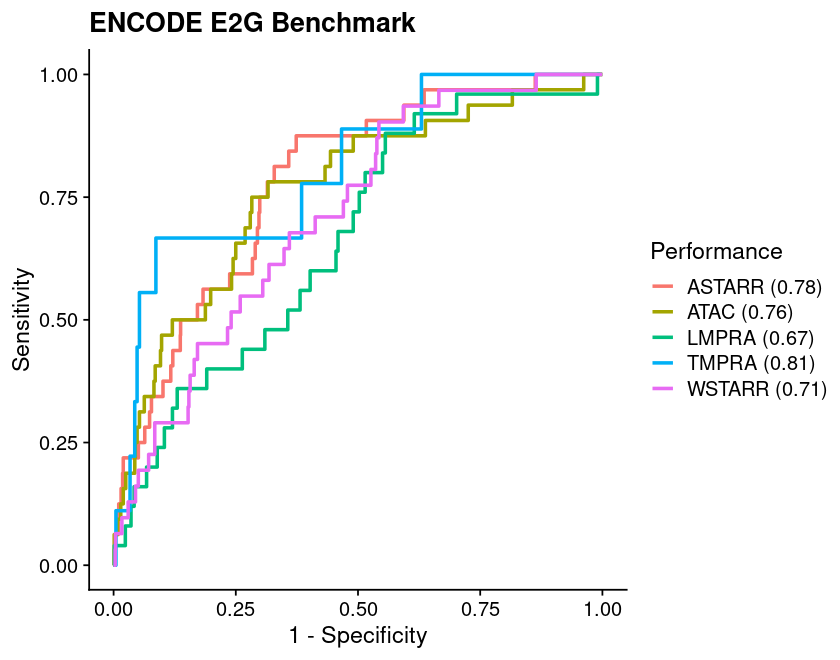

In [20]:
dat = dat_assay_auroc
gpt = ggplot(dat, aes(x=x, y=y, group=Assay, color=Performance)) +
    geom_line(linewidth=1) +
    #geom_point() +
    labs(x = "1 - Specificity", y = "Sensitivity", title="ENCODE E2G Benchmark") +
    theme_cowplot()

options(repr.plot.width=7, repr.plot.height=5.5)
print(gpt)